## Importing Libraries

In [42]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

import warnings
warnings.filterwarnings ('ignore')
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
pd.options.display.max_rows = 100

In [2]:
measurements_df = pd.read_csv('measurements.csv', sep=',')

In [3]:
measurements_df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


## Data Cleaning

### Checking for Null Values

In [4]:
measurements_df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

### Checking data types

In [5]:
measurements_df.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

### Converting numerical columns to intergers
### Also converting a categorical column to numerical for the purpose of filling missing values with KNN

In [6]:
measurements_df["distance"] = pd.to_numeric(measurements_df["distance"], errors='coerce').fillna(0, downcast='infer')
measurements_df["consume"] = pd.to_numeric(measurements_df["consume"], errors='coerce').fillna(0, downcast='infer')
measurements_df["temp_inside"] = pd.to_numeric(measurements_df["temp_inside"], errors='coerce').fillna(0, downcast='infer')
measurements_df["specials"] = pd.to_numeric(measurements_df["specials"], errors='coerce').fillna(0, downcast='infer')

In [7]:
measurements_df.dtypes

distance          int64
consume           int64
speed             int64
temp_inside       int64
temp_outside      int64
specials          int64
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

### Dropping columns with high percentage missing values

In [8]:
measurements_df.drop(columns=['refill liters','refill gas'], inplace=True)

### Using KNN to fill missing values

In [9]:
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [10]:
KNN_X = measurements_df._get_numeric_data()

In [11]:
# fit on the dataset
imputer.fit(KNN_X)

KNNImputer()

In [12]:
Xtrans = imputer.transform(KNN_X)

In [13]:
measurements_df.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
specials        0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

## Exploratory Data Anlysis

In [14]:
measurements_df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun
0,28,5,26,0,12,0,E10,0,0,0
1,12,0,30,0,13,0,E10,0,0,0
2,0,0,38,0,15,0,E10,0,0,0
3,0,0,36,0,14,0,E10,0,0,0
4,0,0,46,0,15,0,E10,0,0,0
...,...,...,...,...,...,...,...,...,...,...
383,16,0,39,0,18,0,SP98,0,0,0
384,0,0,38,25,31,0,SP98,1,0,0
385,16,0,45,25,19,0,SP98,0,0,0
386,0,0,42,25,31,0,SP98,1,0,0


<AxesSubplot:xlabel='consume', ylabel='count'>

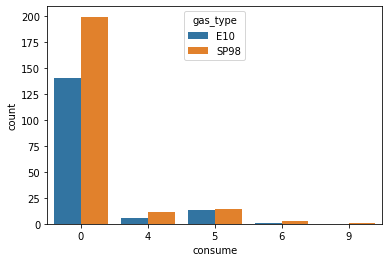

In [15]:
sns.countplot(measurements_df['consume'], hue = measurements_df['gas_type'])

<AxesSubplot:xlabel='speed', ylabel='count'>

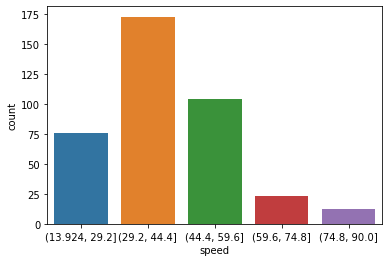

In [16]:
sns.countplot(pd.cut(measurements_df['speed'], bins=5))

<AxesSubplot:xlabel='gas_type', ylabel='count'>

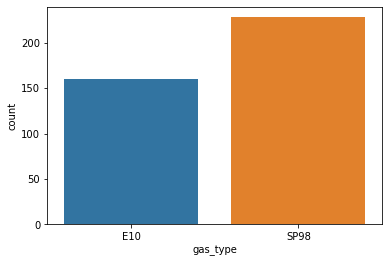

In [17]:
sns.countplot(measurements_df['gas_type'])

<AxesSubplot:ylabel='speed'>

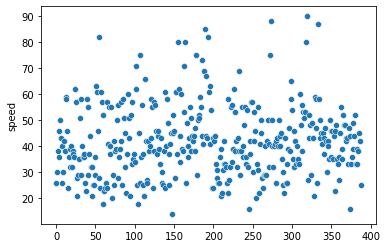

In [18]:
sns.scatterplot(data =measurements_df['speed'])

### Correlation Heat Map

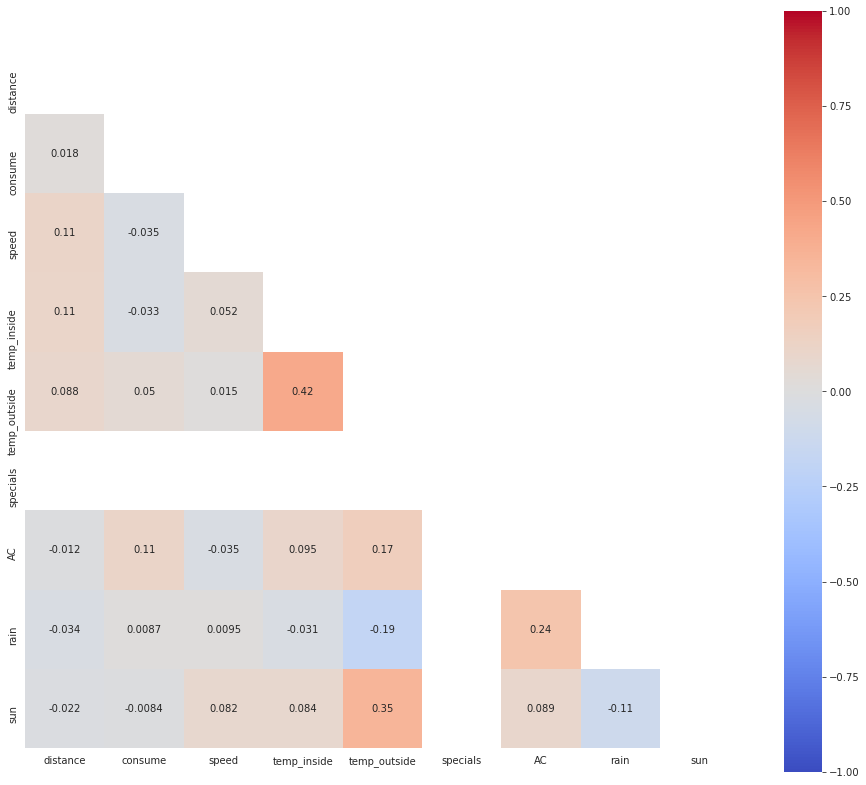

In [19]:
corr = measurements_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 14))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

## Finding the best combustible

In [20]:
### Hypothesis
#### There is no relationship between combustible (gas_type) and speed/consume

### Linear Regression

### Libraries

In [21]:
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
numeric=measurements_df._get_numeric_data()
numeric

,distance,consume,speed,temp_inside,temp_outside,specials,AC,rain,sun
0,28,5,26,0,12,0,0,0,0
1,12,0,30,0,13,0,0,0,0
2,0,0,38,0,15,0,0,0,0
3,0,0,36,0,14,0,0,0,0
4,0,0,46,0,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16,0,39,0,18,0,0,0,0
384,0,0,38,25,31,0,1,0,0
385,16,0,45,25,19,0,0,0,0
386,0,0,42,25,31,0,1,0,0


In [29]:
categoricals= measurements_df.select_dtypes('object')
categoricals

,gas_type
0,E10
1,E10
2,E10
3,E10
4,E10
...,...
383,SP98
384,SP98
385,SP98
386,SP98


### Converting Categoricals to dummies

In [31]:
categoricals=pd.get_dummies(categoricals, drop_first=True)

In [33]:
df = pd.concat([numeric,categoricals],axis=1)
df

,distance,consume,speed,temp_inside,temp_outside,specials,AC,rain,sun,gas_type_SP98
0,28,5,26,0,12,0,0,0,0,0
1,12,0,30,0,13,0,0,0,0,0
2,0,0,38,0,15,0,0,0,0,0
3,0,0,36,0,14,0,0,0,0,0
4,0,0,46,0,15,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
383,16,0,39,0,18,0,0,0,0,1
384,0,0,38,25,31,0,1,0,0,1
385,16,0,45,25,19,0,0,0,0,1
386,0,0,42,25,31,0,1,0,0,1


In [34]:
## xy split
x=df.drop('gas_type_SP98', axis=1)
y=df.gas_type_SP98

In [35]:
## seperating the data into train and test for both a and y variables
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.30, random_state=100)

In [36]:
##. finding the parameters ( mean, variance from the training set )
std_scaler=StandardScaler().fit(x_train)
x_train_scaled=std_scaler.transform(x_train)

In [37]:
## checking shape of training sample
x_train.shape

(271, 9)

In [38]:
x_test_scaled=std_scaler.transform(x_test)

In [39]:
# calculation of the LR model with the use of pandas
x_train_const_scaled = sm.add_constant(x_train_scaled) # adding a constant

model = sm.OLS(y_train, x_train_const_scaled).fit()
predictions_train = model.predict(x_train_const_scaled) 

x_test_const_scaled = sm.add_constant(x_test_scaled) # adding a constant
predictions_test = model.predict(x_test_const_scaled) 
print_model = model.summary(xname=['const'] + list(x.columns))
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          gas_type_SP98   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     5.111
Date:                Thu, 26 May 2022   Prob (F-statistic):           6.28e-06
Time:                        15:28:54   Log-Likelihood:                -170.46
No. Observations:                 271   AIC:                             358.9
Df Residuals:                     262   BIC:                             391.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6089      0.028     21.714   

In [40]:
predictions_test

array([0.45617853, 0.42821201, 0.45162115, 0.44092269, 0.43153805,
       0.45236885, 0.51001698, 0.45753213, 0.53110099, 0.44511128,
       0.77882569, 0.7551842 , 0.64572713, 0.47339388, 0.40376533,
       0.3905147 , 0.81522571, 0.88651481, 0.73791448, 0.45753213,
       0.88853751, 0.48002943, 0.54663074, 0.41647601, 0.42192912,
       0.39246408, 0.4314259 , 0.84672321, 0.69999894, 0.46956581,
       0.41564624, 0.43689514, 0.42821201, 0.40892861, 0.77536166,
       0.94789911, 0.41326212, 0.58472288, 0.59997872, 0.59295514,
       0.75578844, 0.52358181, 0.77882569, 0.44554602, 0.38350725,
       0.76207133, 0.42933161, 0.87871628, 0.71382486, 0.81122689,
       0.81052994, 0.48592029, 0.92363418, 0.69797796, 0.41272216,
       0.44121251, 0.7572785 , 0.70148169, 0.76175691, 0.91478865,
       0.41662093, 0.52243214, 0.43251274, 0.76818471, 0.4661363 ,
       0.84339047, 0.44077777, 0.59169063, 0.59407475, 0.39314895,
       0.68800846, 0.72498557, 0.62929489, 0.39582289, 0.43629

In [43]:
model=LinearRegression()    # model
model.fit(x_train_scaled, y_train)   # model train

LinearRegression()

In [44]:
model.coef_

array([ 6.22555928e-03,  1.55397366e-02, -2.91078050e-02,  1.57044759e-01,
        2.25124804e-02,  6.93889390e-18,  1.74473196e-02,  4.80795322e-02,
        4.94532933e-03])

In [45]:
model.intercept_

0.6088560885608856

In [47]:
y_pred=model.predict(x_test_scaled)   # model prediction

y_pred_train=model.predict(x_train_scaled)

In [48]:
#Evaluating the model
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
244,0,0.456179
75,1,0.428212
236,0,0.451621
98,1,0.440923
248,0,0.431538
...,...,...
254,0,0.489293
151,0,0.508167
268,0,0.430137
166,0,0.398747


In [49]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

0.22202728688548481
0.4329333899383728


## Classification

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [53]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=uint8), array([160, 228], dtype=int64))

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 

log_model.fit(x_train_scaled, y_train)

#X_train_mod = trans.transform(X_train)
#X_test_mod  = trans.transform(X_test)

y_pred_train_log = log_model.predict(x_train_scaled)
y_pred_test_log = log_model.predict(x_test_scaled)

recall_average = recall_score(y_test, y_pred_test_log, average="binary", pos_label='1')

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log, pos_label='1'),
                                         recall_score(y_train, y_pred_train_log, pos_label='1')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label='1'),
                                        recall_score(y_test, y_pred_test_log, pos_label='1')]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,x_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,x_test_scaled,y_test, values_format = 'd')
plt.show()

ValueError: pos_label=1 is not a valid label. It should be one of [0, 1]